# The Sparks Foundation - GRIP

## Data Science and business Analytics

## Task 5: Exploratory Data Analysis- IPL Sports

### Arti Gupta

## Description of the dataset¶
In this project, there are two datasets: 
1. Matches.csv 
2. Deliveries.csv
1) The Matches dataset contains information about various matches played in a sports league. This dataset consists of 756 records with 18 columns. The columns capture various details about each match, including the participating teams, match outcomes, venue, and officiating umpires.
It includes 18 variables:
1. id: Unique identifier for each match.
2. season: Year or season in which the match was played.
3. city: City where the match was played. 
4. date: Date when the match was played.
5. team1: Name of the first team.
6. team2: Name of the second team.
7. toss_winner: Name of the team that won the toss.
8. toss_decision: Decision taken by the toss-winning team (bat or field).
9. result: Result of the match (e.g., normal, tie, no result).
10. dl_applied: Indicator if the Duckworth-Lewis method was applied (1 if applied, 0 otherwise).
11. winner: Name of the winning team. 
12. win_by_runs: Margin of victory if the team won by runs.
13. win_by_wickets: Margin of victory if the team won by wickets.
14. player_of_match: Name of the player awarded as the Player of the Match. 
15. venue: Venue where the match was played.
16. umpire1: Name of the first umpire. 
17. umpire2: Name of the second umpire. 
18. umpire3: Name of the third umpire, if any. 
2) The Deliveries dataset contains ball-by-ball information for each delivery bowled in the matches. This dataset consists of 179,078 records with 21 columns, capturing detailed data on each ball, including the batsmen, bowlers, runs scored, and any dismissals.
It include 21 variables:
1. match_id: Identifier linking each delivery to a match in the Matches dataset.
2. inning: Inning number of the match.
3. batting_team: Name of the batting team.
4. bowling_team: Name of the bowling team.
5. over: Over number within the inning.
6. ball: Ball number within the over.
7. batsman: Name of the batsman facing the delivery.
8. non_striker: Name of the non-striker batsman.
9. bowler: Name of the bowler delivering the ball.
10. is_super_over: Indicator if the ball was bowled in a super over (1 if yes, 0 otherwise).
11. wide_runs: Number of runs scored due to a wide delivery.
12. bye_runs: Number of runs scored as byes.
13. legbye_runs: Number of runs scored as leg byes.
14. noball_runs: Number of runs scored due to a no-ball.
15. penalty_runs: Number of runs scored as penalties.
16. batsman_runs: Number of runs scored by the batsman on that delivery.
17. extra_runs: Total number of extra runs scored on that delivery.
18. total_runs: Total number of runs scored on that delivery.
19. player_dismissed: Name of the player dismissed on that delivery. 
20. dismissal_kind: Type of dismissal (e.g., caught, bowled). 
21. fielder: Name of the fielder involved in the dismissal, if any. 


## Goal of the Project
In this projet, I am going to perform Exploratory Data Analysis (EDA) on the given datasets of matches and deliveries in IPL sports, specifically cricket. The objective is to gain insights into the most successful teams and players, identify factors contributing to a team's win or loss, and provide recommendations for endorsements based on performance. The analysis will involve data cleaning, merging the datasets, and creating visualizations to uncover patterns and trends.

## Tools Used
1. pandas for data manipulation
2. numpy is mostly used for working in numerical values
3. Seaborn and matplotlib  for visualization graph.
4. sklearn for filling missing values

## Load the dataset of deliveries

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_del=pd.read_csv("deliveries.csv")
df_del.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Data Preprocessing of deliveries dataset

In [5]:
df_del.shape

(179078, 21)

In [6]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
df_del.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

It shows that there are missing values in three column such as player_dismissed has 170244 missing values, dismissal_kind has 170244 missing values and fielder has 172630 missig values. 

In [8]:
df_del.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Count the values of object datatype

In [9]:
for column in df_del.columns:
    if df_del[column].dtype=="object":
        print(f"Column: {column}")
        print(df_del[column].value_counts(dropna=False))
        print("\n")

Column: batting_team
batting_team
Mumbai Indians                 22619
Kings XI Punjab                20931
Royal Challengers Bangalore    20908
Kolkata Knight Riders          20858
Chennai Super Kings            19762
Delhi Daredevils               18786
Rajasthan Royals               17292
Sunrisers Hyderabad            12908
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1909
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64


Column: bowling_team
bowling_team
Mumbai Indians                 22517
Royal Challengers Bangalore    21236
Kolkata Knight Riders          20940
Kings XI Punjab                20782
Chennai Super Kings            19556
Delhi Daredevils               18725
Rajasthan Royals               17382
Sunrisers Hyderabad            12779
Deccan Chargers                 9039
Pune Warriors   

## Filling missing values

SimpleImputer is used for handling missing data in a dataset by providing a strategy to impute missing values with appropriate replacements.Those three column has object datatype .So, use strategy='most_frequent' to replace missing values with the most frequent value.

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
categorical_columns = ['player_dismissed', 'dismissal_kind', 'fielder']

In [12]:
imputer = SimpleImputer(strategy='most_frequent')
df_del[categorical_columns] = imputer.fit_transform(df_del[categorical_columns])

In [13]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Load the dataset of matches

In [14]:
df_mat=pd.read_csv("matches.csv")
df_mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Data Preprocessing of matches dataset

In [15]:
df_mat.shape

(756, 18)

In [16]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [17]:
df_mat.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

It shows that there are missing values in five column such as city,winner,umpire1,umpire2 and umpire3.

## Filling missing values

In [18]:
categorical_columns2=['city','winner','player_of_match','umpire1','umpire2']

In [19]:
imputer = SimpleImputer(strategy='most_frequent')
df_mat[categorical_columns2] = imputer.fit_transform(df_mat[categorical_columns2])

In [20]:
df_mat=df_mat.drop("umpire3",axis=1)

In [21]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(5), object(12)
memory usag

In [22]:
df_mat.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


## Combined both datasets matches and delieveries

In [23]:
combined = df_del.merge(df_mat, left_on='match_id', right_on='id')

In [24]:
combined.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


## Exploratory Data Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

## Find the most successful teams

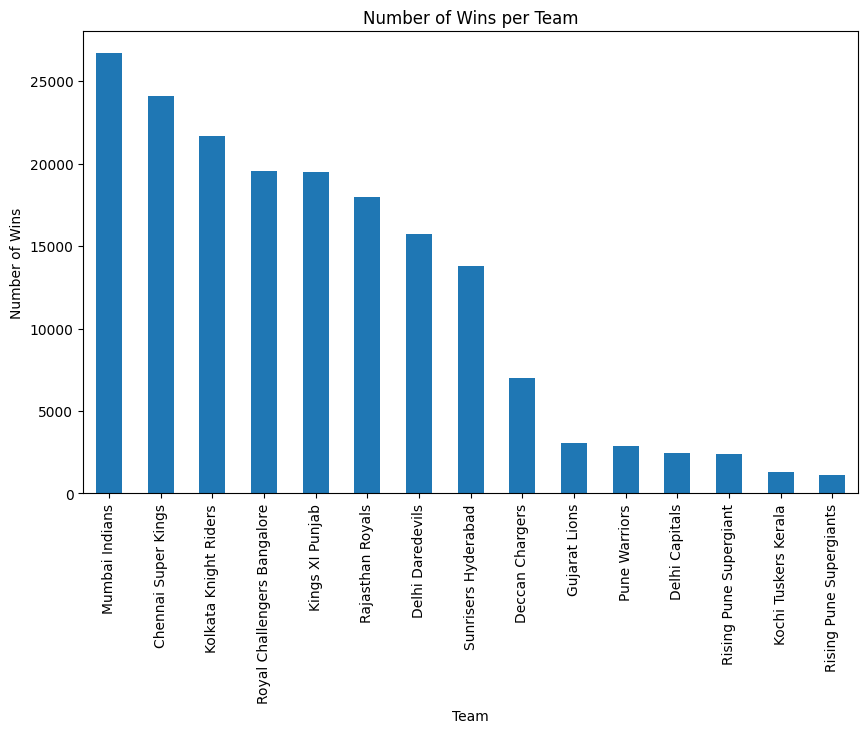

In [26]:
wins_per_team = combined['winner'].value_counts()

plt.figure(figsize=(10, 6))
wins_per_team.plot(kind='bar')
plt.title('Number of Wins per Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()

From the above barplot shows that: Mumbai Indians and Chennai Super Kings are the most successful teams. 

## Most Successful Players

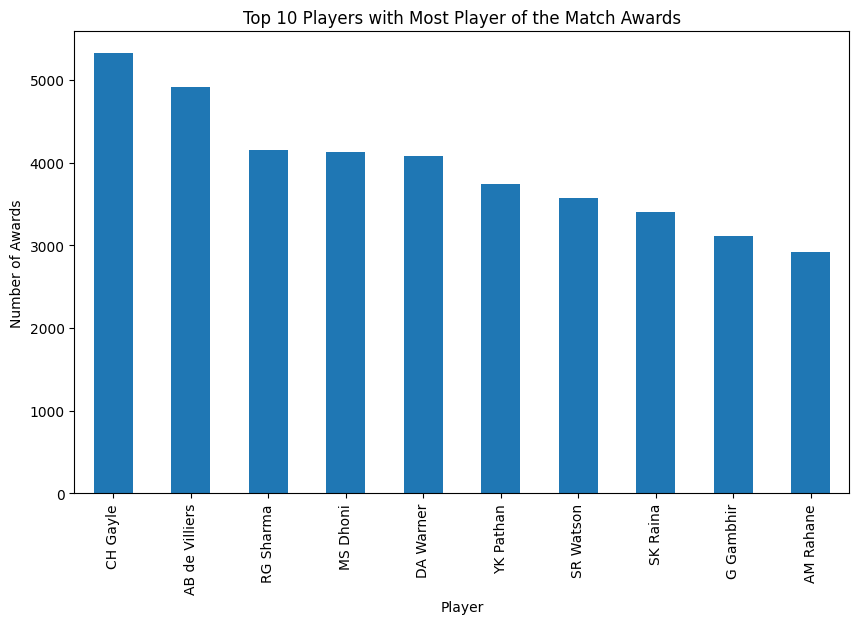

In [27]:
player_of_match_awards = combined['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10, 6))
player_of_match_awards.plot(kind='bar')
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.show()

From the above barplot shows : CH Gayle and AB de Villiers are the most successful players

## Distribution of Win by Runs

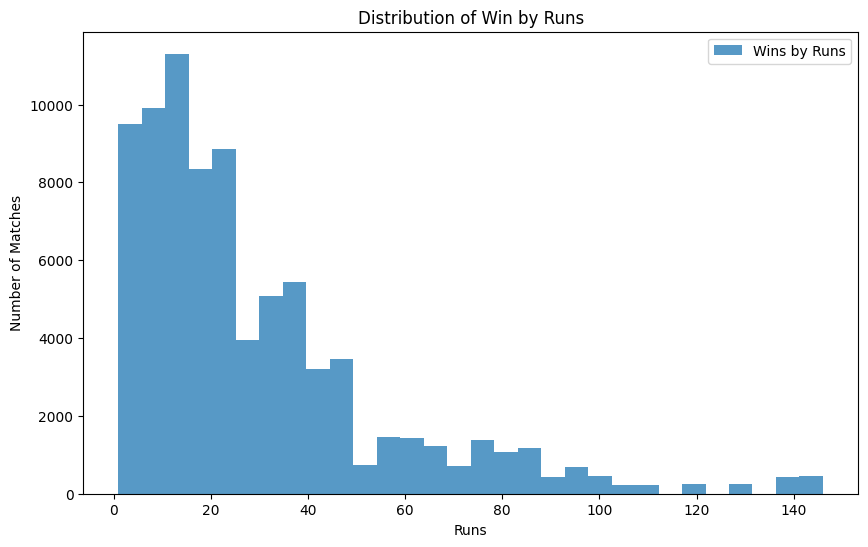

In [28]:
win_by_runs = combined[combined['win_by_runs'] > 0]

plt.figure(figsize=(10, 6))
plt.hist(win_by_runs['win_by_runs'], bins=30, alpha=0.75, label='Wins by Runs')
plt.xlabel('Runs')
plt.ylabel('Number of Matches')
plt.title('Distribution of Win by Runs')
plt.legend()
plt.show()

## Distribution of Win by Wickets

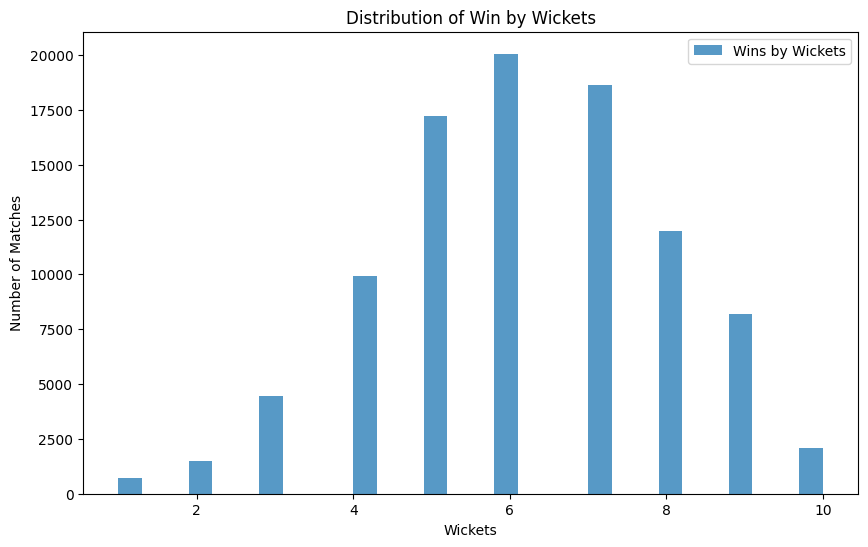

In [29]:
win_by_wickets = combined[combined['win_by_wickets'] > 0]
plt.figure(figsize=(10, 6))
plt.hist(win_by_wickets['win_by_wickets'], bins=30, alpha=0.75, label='Wins by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Number of Matches')
plt.title('Distribution of Win by Wickets')
plt.legend()
plt.show()

## Impact of Toss Decision

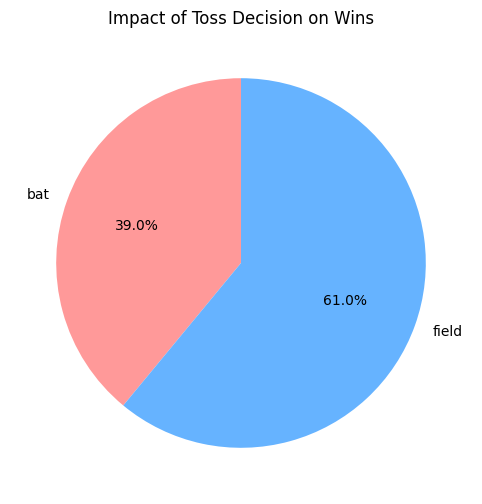

In [30]:
toss_decision = combined.groupby('toss_decision')['winner'].count().reset_index()
toss_decision.columns = ['Toss Decision', 'Wins']

plt.figure(figsize=(8, 6))
plt.pie(toss_decision['Wins'], labels=toss_decision['Toss Decision'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Impact of Toss Decision on Wins')
plt.show()

This chart shows how the decision to bat or field first after winning the toss impacts the number of wins.This barplot observe that the decision to field first after winning the toss has been more popular compared to the decision to bat first. 

## Top Batsman by Runs

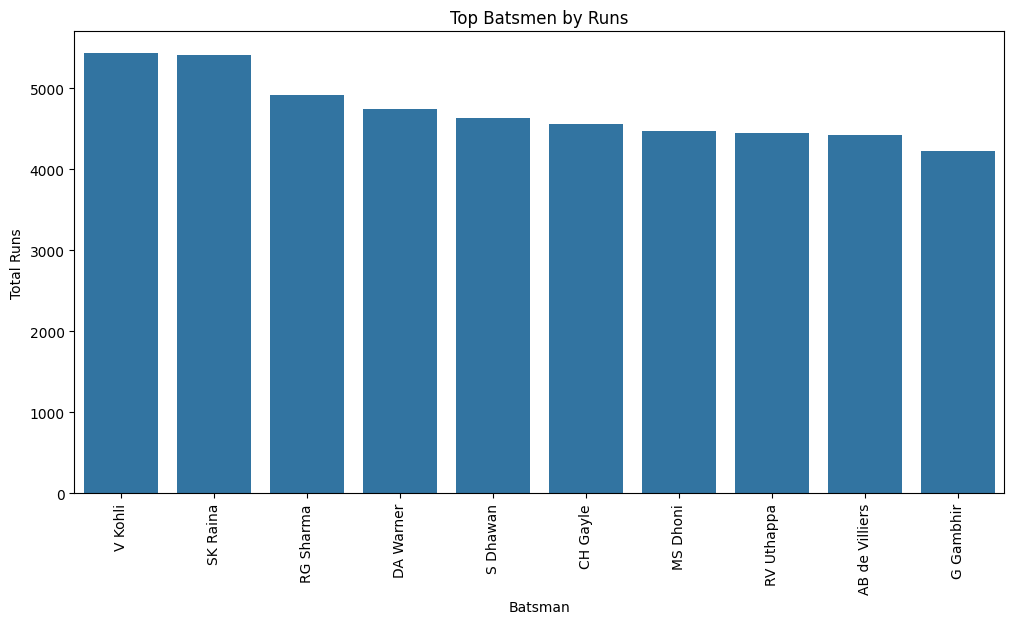

In [31]:
top_batsmen = combined.groupby('batsman')['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman', y='batsman_runs', data=top_batsmen)
plt.xticks(rotation=90)
plt.title('Top Batsmen by Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.show()

Above barplot shows that V Kohli and SK Raina are the top batsman by runs.

## Top Bowlers by Wickets

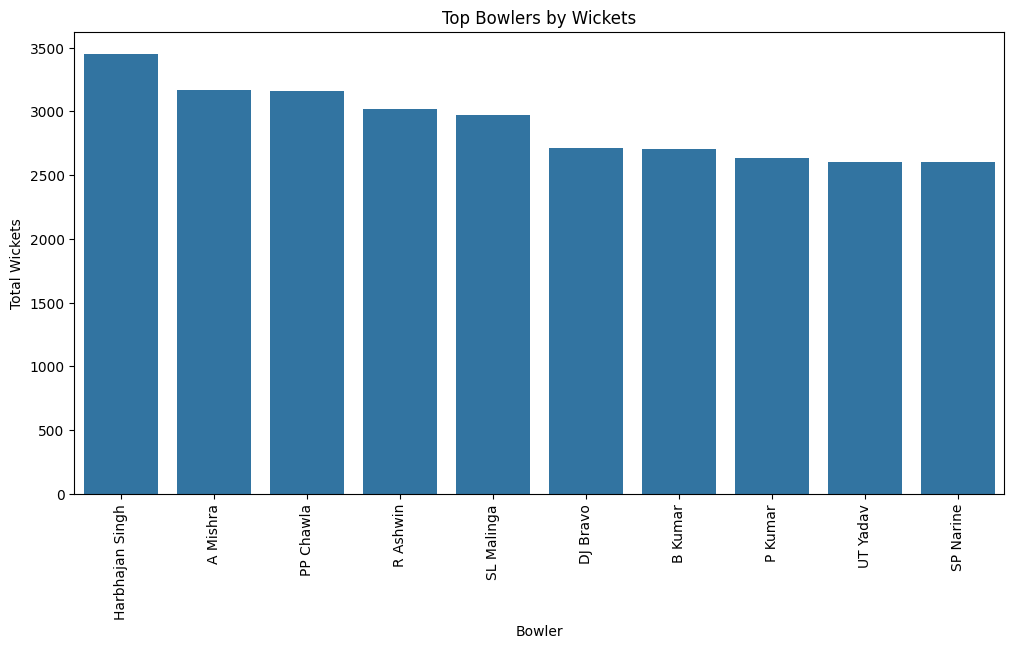

In [32]:
top_bowlers = combined[combined['player_dismissed'].notnull()]['bowler'].value_counts().head(10).reset_index()
top_bowlers.columns = ['Bowler', 'Wickets']
plt.figure(figsize=(12, 6))
sns.barplot(x='Bowler', y='Wickets', data=top_bowlers)
plt.xticks(rotation=90)
plt.title('Top Bowlers by Wickets')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.show()

From the above graph shows that Harbhajan Singh and A Mishra are the top bowlers by wickets.

## Top Batsman Hit Most Fours

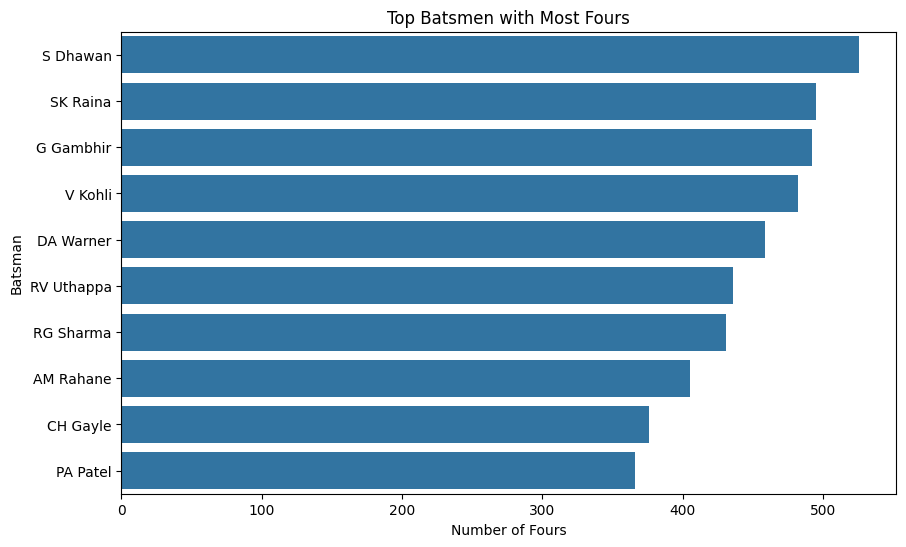

In [33]:
fours = combined.groupby('batsman')['batsman_runs'].agg(lambda x: (x == 4).sum()).reset_index()
fours.columns = ['batsman', 'fours']

plt.figure(figsize=(10, 6))
sns.barplot(x='fours', y='batsman', data=fours.sort_values(by='fours', ascending=False).head(10))
plt.title('Top Batsmen with Most Fours')
plt.xlabel('Number of Fours')
plt.ylabel('Batsman')
plt.show()

## Top Batsman Hit Most Sixers¶

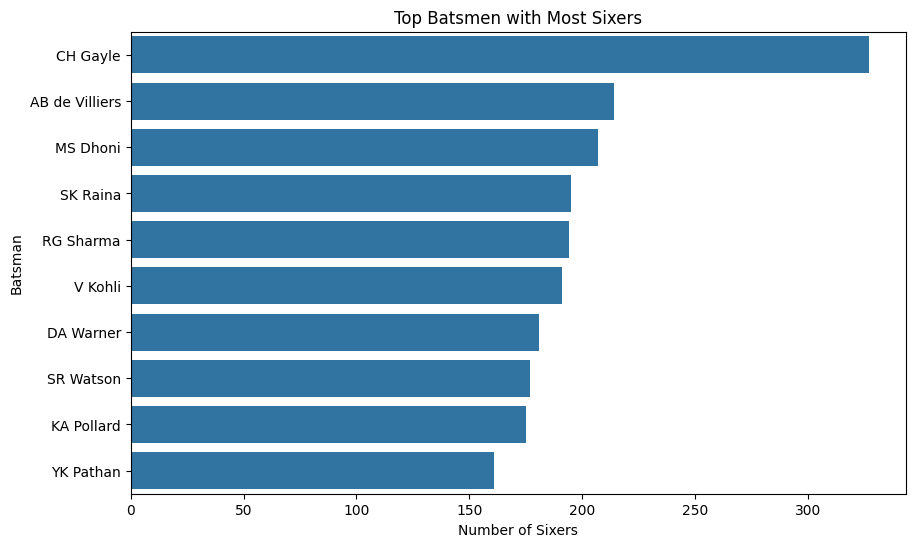

In [34]:
Sixers = combined.groupby('batsman')['batsman_runs'].agg(lambda x: (x == 6).sum()).reset_index()
Sixers.columns = ['batsman', 'Sixers']

plt.figure(figsize=(10, 6))
sns.barplot(x='Sixers', y='batsman', data=Sixers.sort_values(by='Sixers', ascending=False).head(10))
plt.title('Top Batsmen with Most Sixers')
plt.xlabel('Number of Sixers')
plt.ylabel('Batsman')
plt.show()

## Top Venues With Most Wins

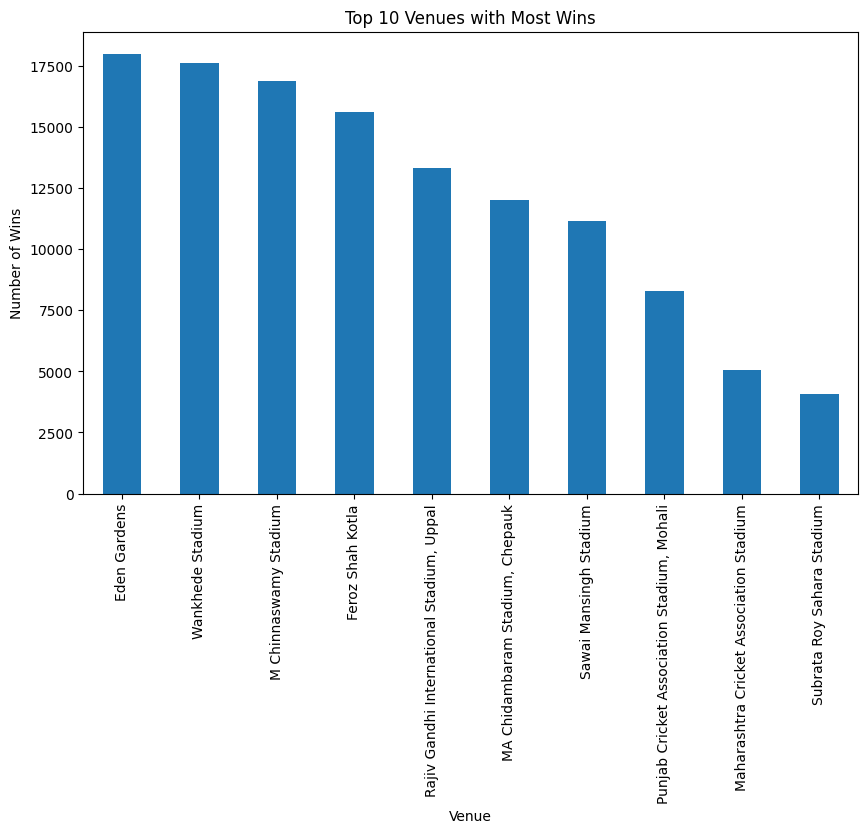

In [47]:
venue_wins = combined['venue'].value_counts().head(10)

venue_wins.plot(kind='bar', title='Top 10 Venues with Most Wins', figsize=(10, 6))
plt.xlabel('Venue')
plt.ylabel('Number of Wins')
plt.show()

In [48]:
dl_applied_matches = combined[combined['dl_applied'] == 1].shape[0]

print(f"Number of matches where DL method was applied: {dl_applied_matches}")

Number of matches where DL method was applied: 3208


## Types of Dismissal

In [65]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

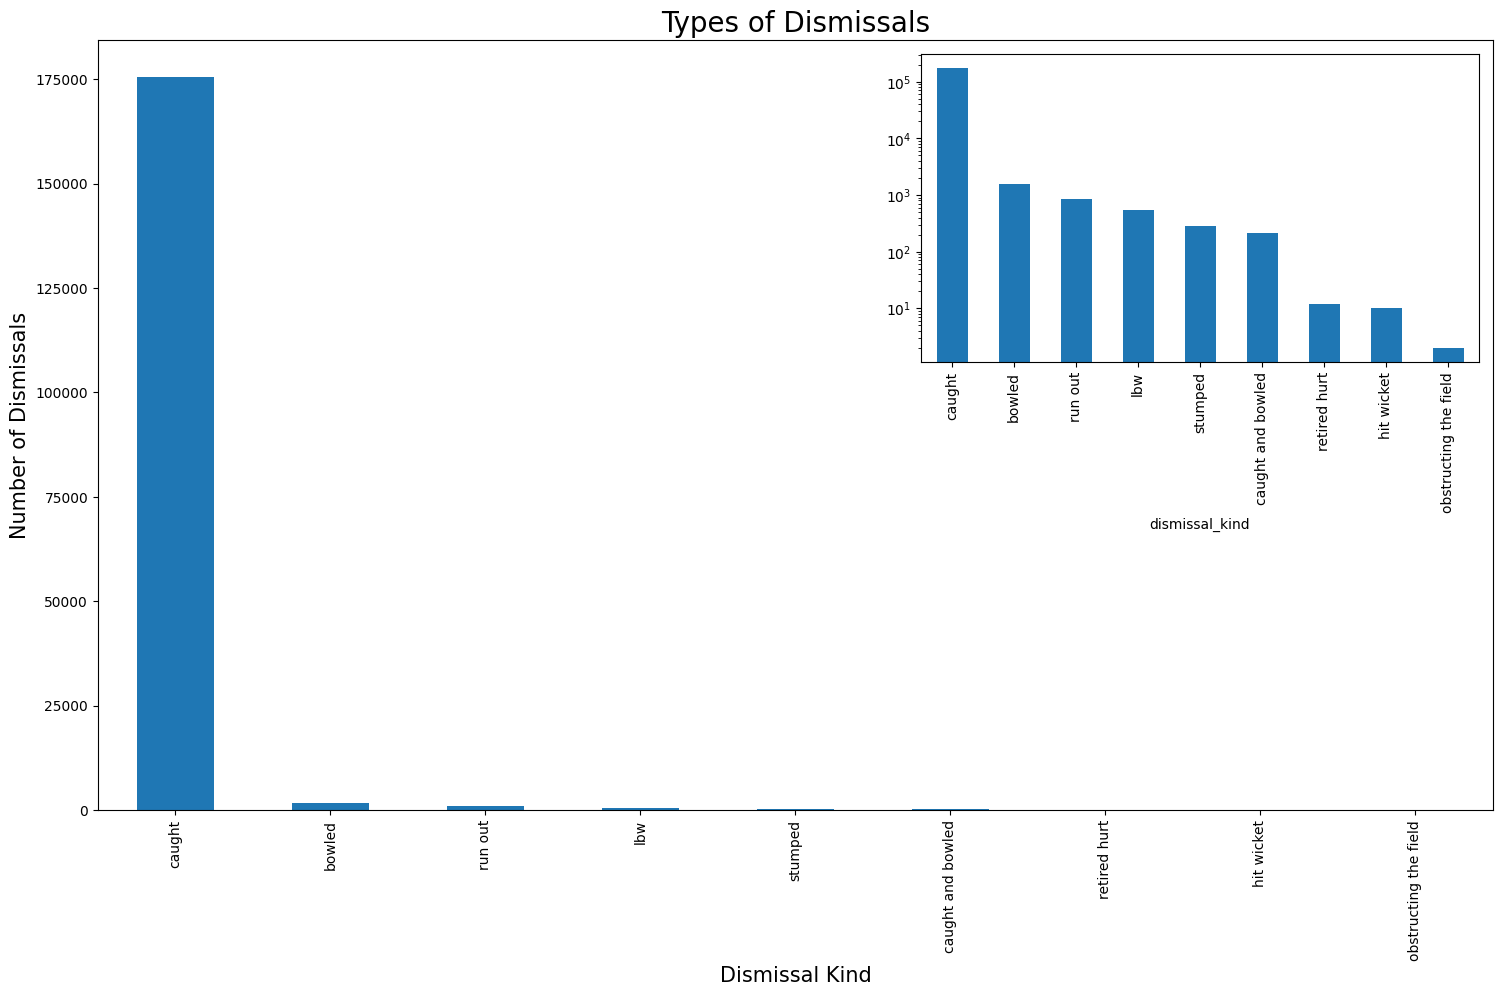

dismissal_kind
caught                   175592
bowled                     1581
run out                     852
lbw                         540
stumped                     278
caught and bowled           211
retired hurt                 12
hit wicket                   10
obstructing the field         2
Name: count, dtype: int64

In [72]:
dismissal_kinds = combined['dismissal_kind'].value_counts()

fig, ax = plt.subplots(figsize=(18, 10))
dismissal_kinds.plot(kind='bar', ax=ax)
ax.set_title('Types of Dismissals', fontsize=20)
ax.set_xlabel('Dismissal Kind', fontsize=15)
ax.set_ylabel('Number of Dismissals', fontsize=15)
ax.set_xticks(range(len(dismissal_kinds)))
ax.set_xticklabels(dismissal_kinds.index, rotation=90)

axins = inset_axes(ax, width="40%", height="40%", loc='upper right', borderpad=1)
dismissal_kinds.plot(kind='bar', ax=axins)
axins.set_yscale('log')  # Use log scale for inset to highlight smaller values
axins.set_xticklabels(dismissal_kinds.index, rotation=90)
plt.show()
combined["dismissal_kind"].value_counts()

## Final Match Findings

In [73]:
final_matches = combined[['toss_winner', 'toss_decision', 'winner']].dropna().reset_index(drop=True)
final_matches_count = final_matches.groupby(['toss_winner', 'toss_decision', 'winner']).size().unstack(fill_value=0)

print(final_matches_count)

winner                                     Chennai Super Kings  \
toss_winner                 toss_decision                        
Chennai Super Kings         bat                           7218   
                            field                         6517   
Deccan Chargers             bat                            250   
                            field                          233   
Delhi Capitals              bat                            246   
                            field                          223   
Delhi Daredevils            bat                            248   
                            field                          973   
Gujarat Lions               bat                              0   
                            field                            0   
Kings XI Punjab             bat                            444   
                            field                          253   
Kochi Tuskers Kerala        bat                              0   
          

## Conclusion

1. Mumbai Indians and Chennai Super Kings are the most successful teams.
2. CH Gayle and AB de Villiers are the most successful players.
3. The decision to field first after winning the toss has been more wins compared to     the decision to bat first.
4. V Kohli and SK Raina are the top batsman by runs.
5. Harbhajan Singh and A Mishra are the top bowlers by wickets.
6. S Dhawan and SK Raina are the top batsman with hit most fours.
7. CH Gayle and AB de Villiers are the top batsman with hit most sixers.
8. Eden Gardens and Wankhede Stadium are the top venues with most wins.
9. There are 3208 matches where Duckworth-Lewis method was applied.
10. Dismissal in IPL was most by catch out.
11. Teams like CSK should continue their strategy of batting first after winning the      toss as it results in high scores and often leads to victory.
12. Teams like RCB and SRH should focus on fielding first when they win the toss,         given their strong chasing capabilities.